In [1]:
from netCDF4 import Dataset                     # For reading data
from matplotlib import pyplot as plt            # For plotting
import numpy as np
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # Large figures


Populating the interactive namespace from numpy and matplotlib


In [2]:
resolutions = ['1m', '5m', '10m'];
timesteps = dict();
timesteps['1m']=['60s', '300s', '600s','1200s']
timesteps['5m']=['1200s']
timesteps['10m']=['60s', '300s', '600s','1200s']
start_day = dict();
end_day   = dict();
start_day['60s'] = 5*1496
end_day['60s'] = 6*1496
start_day['300s'] = 5*300
end_day['300s'] = 6*300
start_day['600s'] = 5*150
end_day['600s'] = 6*150
start_day['1200s'] = 5*75
end_day['1200s'] = 6*75

data  = dict();
for dz in resolutions:
    for dt in timesteps[dz]:
        data_in = Dataset('/NO_BACKUP/Dropbox/iPython/kauff/test_output/'+dz+'_'+dt+'.nc')
        ind = dz+'_'+dt
        data[ind]  = dict();
        data[ind]['time'] = data_in.variables['time'][:]-366.
        data[ind]['day_for_plot'] = "day %d" % int(data[ind]['time'][end_day[dt]-1])
        data[ind]['h'] = -data_in.variables['HBLT'][:,0,0]/100
        data[ind]["w'T'_raw"] = data_in.variables['VTTF_norm'][:,:,0,0]
        data[ind]['zl'] = -data_in.variables['z_w_bot'][:]/100
        data[ind]["w'T'"] = [1.0]
        for wt in data[ind]["w'T'_raw"][start_day[dt]-1,:]:
            data[ind]["w'T'"].append(float(wt))
        for t in range(start_day[dt],end_day[dt]):
            data[ind]["w'T'"][1:] = data[ind]["w'T'"][1:] + data[ind]["w'T'_raw"][t,:]
        data[ind]["w'T'"] = numpy.array(data[ind]["w'T'"])
        data[ind]["w'T'"][1:] = data[ind]["w'T'"][1:]/(end_day[dt] - start_day[dt] + 1)
        data[ind]['zplot'] = [0.0]
        for z in data[ind]['zl']:
            data[ind]['zplot'].append(float(z))
        

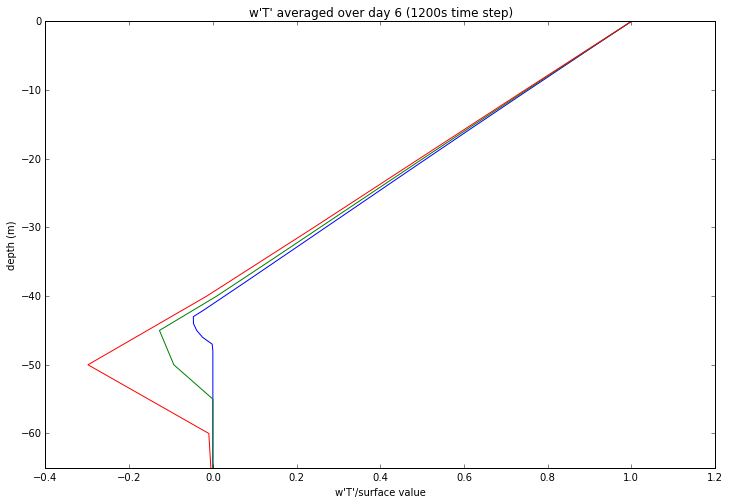

In [3]:
for dz in resolutions:
    plt.plot(data[dz+'_1200s']["w'T'"],data[dz+'_1200s']['zplot'],'-');
plt.title("w'T' averaged over "+data['10m_1200s']['day_for_plot'] + " (1200s time step)"); plt.xlabel("w'T'/surface value");
plt.ylabel("depth (m)"); plt.ylim((-65,0));

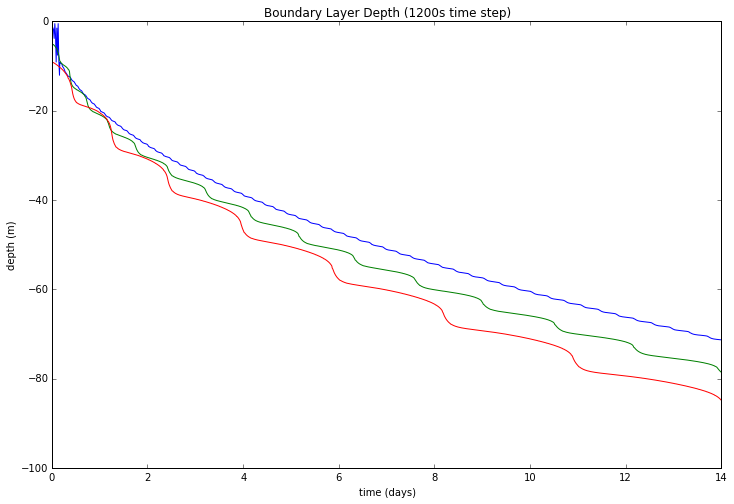

In [4]:
dt = '1200s';
for dz in resolutions:
    ind = dz+'_'+dt
    plt.plot(data[ind]['time'], data[ind]['h'], '-')
plt.title("Boundary Layer Depth ("+dt+" time step)"); plt.xlabel("time (days)");
plt.ylabel("depth (m)"); plt.ylim((-100,0));

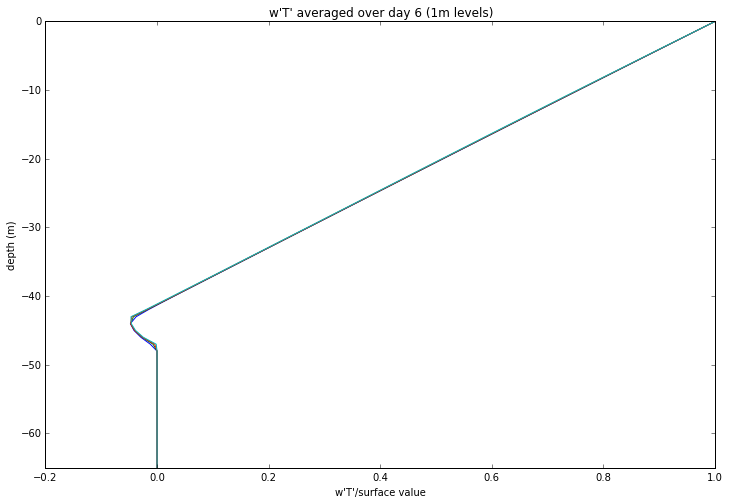

In [5]:
dz = '1m'
for dt in timesteps[dz]:
    ind = dz+'_'+dt
    plt.plot(data[ind]["w'T'"],data[ind]['zplot'],'-');

plt.title("w'T' averaged over "+data[dz+'_1200s']['day_for_plot'] + " (" + dz +" levels)"); plt.xlabel("w'T'/surface value");
plt.ylabel("depth (m)"); plt.ylim((-65,0));

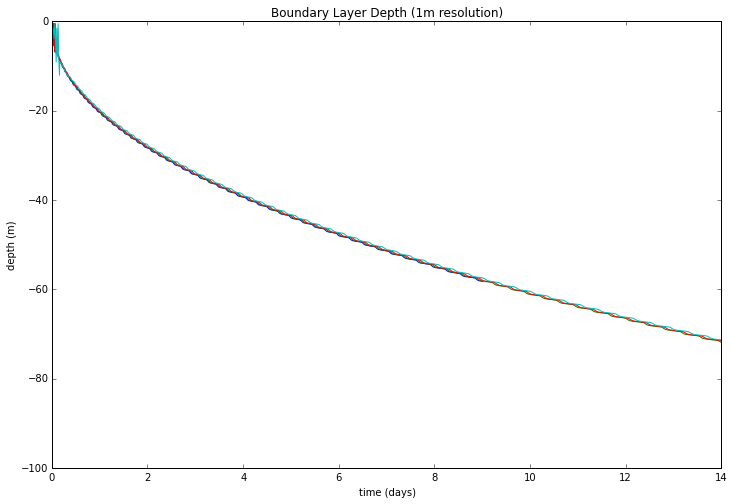

In [6]:
dz = '1m'
for dt in timesteps[dz]:
    ind = dz+'_'+dt
    plt.plot(data[ind]['time'], data[ind]['h'], '-')
plt.title("Boundary Layer Depth ("+dz+" resolution)"); plt.xlabel("time (days)");
plt.ylabel("depth (m)"); plt.ylim((-100,0));

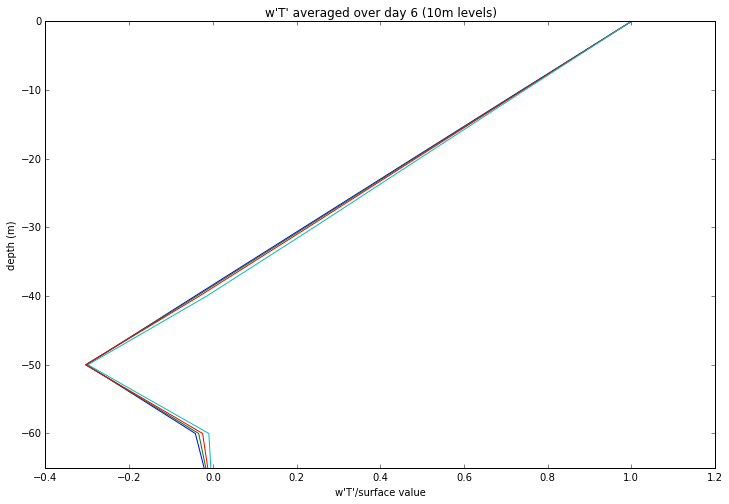

In [7]:
dz = '10m'
for dt in timesteps[dz]:
    ind = dz+'_'+dt
    plt.plot(data[ind]["w'T'"],data[ind]['zplot'],'-');

plt.title("w'T' averaged over "+data[dz+'_1200s']['day_for_plot'] + " (" + dz +" levels)"); plt.xlabel("w'T'/surface value");
plt.ylabel("depth (m)"); plt.ylim((-65,0));

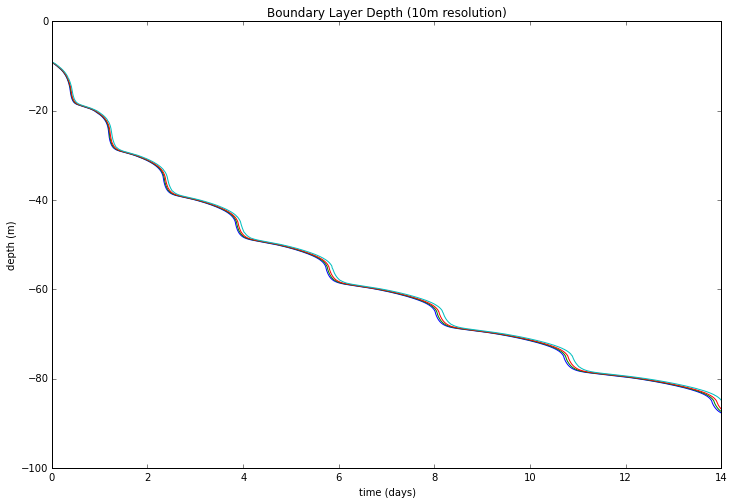

In [8]:
dz = '10m'
for dt in timesteps[dz]:
    ind = dz+'_'+dt
    plt.plot(data[ind]['time'], data[ind]['h'], '-')
plt.title("Boundary Layer Depth ("+dz+" resolution)"); plt.xlabel("time (days)");
plt.ylabel("depth (m)"); plt.ylim((-100,0));